In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from Algorithm.utils import rename_columns, transfer_X, map_output, load_model

import sys

sys.path.append("../Algorithm")

In [2]:
W = pd.read_pickle('../Algorithm/weights_2.pkl')
X = pd.read_pickle('../Data.nosync+/X_t_train.pkl')
y = pd.read_pickle('../Data.nosync+/y_t_train.pkl')
X_source = pd.read_parquet('turbofan_features.parquet', engine='pyarrow')

model = load_model()

In [3]:
X = rename_columns(X_source, X)
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_hat = transfer_X(X, W)
output_translated = map_output(model.predict_proba(X_hat))

/Users/felixschreyer/Documents/Dokumente/Abschlussarbeit/BAR/Algorithm/utils.py:97: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_B[column_name] = 0
/Users/felixschreyer/Documents/Dokumente/Abschlussarbeit/BAR/Algorithm/utils.py:97: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_B[column_name] = 0
/Users/felixschreyer/Documents/Dokumente/Abschlussarbeit/BAR/Algorithm/utils.py:97: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

In [4]:
predicted_classes = np.argmax(output_translated, axis=1)+1
output_translated

array([[0.38559328, 0.1397834 , 0.47462332],
       [0.39323041, 0.19497004, 0.41179955],
       [0.45870511, 0.17153357, 0.36976132],
       [0.44360631, 0.1599657 , 0.39642799],
       [0.38559328, 0.1397834 , 0.47462332],
       [0.39323041, 0.19497004, 0.41179955],
       [0.45870511, 0.17153357, 0.36976132],
       [0.45870511, 0.17153357, 0.36976132],
       [0.43133329, 0.13890539, 0.42976132],
       [0.48084117, 0.11451   , 0.40464883],
       [0.44632716, 0.10579997, 0.44787286],
       [0.44698258, 0.10485454, 0.44816288],
       [0.41031591, 0.13433749, 0.4553466 ],
       [0.41031591, 0.13433749, 0.4553466 ],
       [0.41031591, 0.13433749, 0.4553466 ],
       [0.40781519, 0.13683821, 0.4553466 ],
       [0.40781519, 0.13683821, 0.4553466 ],
       [0.40781519, 0.13683821, 0.4553466 ],
       [0.40680097, 0.13785244, 0.4553466 ],
       [0.40680097, 0.13785244, 0.4553466 ],
       [0.40680097, 0.13785244, 0.4553466 ]])

In [5]:
y

id
(1, 2023-01-01 09:46:12.710000)    1
(1, 2023-01-01 10:01:12.710000)    1
(1, 2023-01-01 10:16:12.710000)    2
(1, 2023-01-01 10:31:12.710000)    3
(2, 2023-01-01 09:11:33.679000)    1
(2, 2023-01-01 09:26:33.679000)    1
(2, 2023-01-01 09:41:33.679000)    1
(2, 2023-01-01 09:56:33.679000)    1
(2, 2023-01-01 10:11:33.679000)    2
(2, 2023-01-01 10:26:33.679000)    3
(2, 2023-01-01 10:41:33.679000)    3
(2, 2023-01-01 10:56:33.679000)    3
(2, 2023-01-01 11:11:33.679000)    3
(2, 2023-01-01 11:26:33.679000)    3
(2, 2023-01-01 11:41:33.679000)    3
(2, 2023-01-01 11:56:33.679000)    3
(2, 2023-01-01 12:11:33.679000)    3
(2, 2023-01-01 12:26:33.679000)    3
(2, 2023-01-01 12:41:33.679000)    3
(2, 2023-01-01 12:56:33.679000)    3
(2, 2023-01-01 13:24:00.960000)    3
Name: RUL_rolled_class, dtype: int64

In [6]:
predicted_classes

array([3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

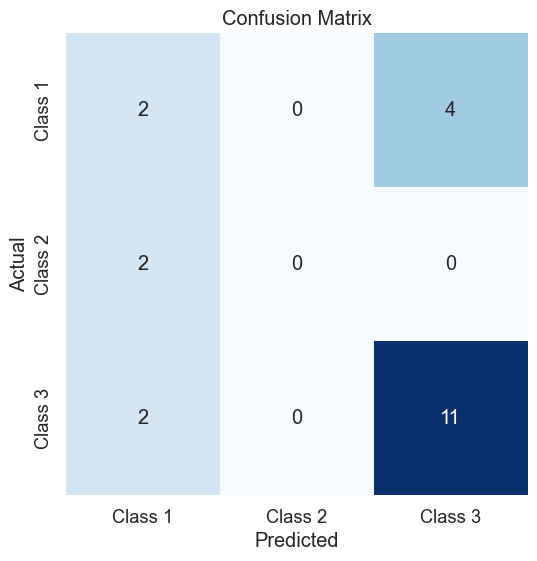

In [7]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true=y, y_pred=predicted_classes)
# Define class labels (change to your own class labels)
class_labels = ["Class 1", "Class 2", "Class 3"]

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font scale for better readability
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, square=True,
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [8]:
from sklearn.utils import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

In [9]:
class_weights

array([1.16666667, 3.5       , 0.53846154])